In [1]:
from lib import *
from features import *

[nltk_data] Downloading package punkt to /home/shashi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/shashi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# importing data

In [2]:
data = pd.read_csv('./train_data.csv')

In [3]:
data = data.sample(frac=0.01).reset_index(drop=True)
size = data.shape
size

(2112, 3)

# Data Visualisation
#showing data distribution over the four categories of headlines
m-Medical
e-Entertainment
b-Bussiness
t-Tech

(array([219.,   0.,   0., 772.,   0.,   0., 617.,   0.,   0., 504.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

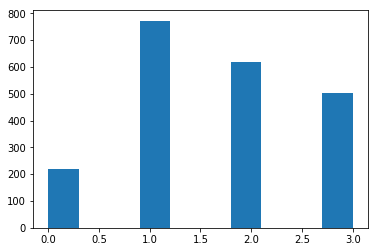

In [4]:
plt.hist(data.CATEGORY.factorize()[0])

# Data  samples

In [5]:
data.head()

,ID,TITLE,CATEGORY
0,254950,Health Department Administers 2011 Vaccines fo...,m
1,229897,Study: UK cities becoming mosquito-friendly ha...,m
2,206904,Once Upon a Time Season 4: A Frozen Foe?,e
3,330454,Market Structure Nightmare Comes True in Barcl...,b
4,201370,"Dr. Dre, hip-hop's first billionaire?",t


In [6]:
for line,i in zip(data['TITLE'],range(data['TITLE'].shape[0])):
    data.loc[i,('TITLE')] = normalise_text(line)

In [7]:
data.head()

,ID,TITLE,CATEGORY
0,254950,health department administers 2011 vaccines he...,m
1,229897,study uk cities becoming mosquitofriendly habi...,m
2,206904,upon time season 4 frozen foe,e
3,330454,market structure nightmare comes true barclays...,b
4,201370,dr dre hip-hop 's first billionaire ?,t


In [8]:
cv_matrix = countVectorizer(data)

In [9]:
categories = data.CATEGORY.factorize()[0]

In [10]:
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:

training_data, testing_data, training_op, test_op = train_test_split(cv_matrix,categories,random_state=0)

In [12]:
dtc_model = DecisionTreeClassifier(min_samples_split=8,criterion='entropy',random_state=10)

In [13]:
dtc_model.fit(training_data,training_op)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [15]:
dtc_model.score(training_data,training_op)

0.9387626262626263

In [16]:
dtc_model.score(testing_data,test_op)

0.6912878787878788